In [5]:
import qiskit
import numpy as np
import sys
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
import qtm.base, qtm.constant, qtm.qcompilation, qtm.ansatz
%load_ext autoreload
%autoreload 2

Here, we run quantum compilation (tomography) for 1 qubit case, see the below scheme. We compare SGD and Adam optimizer.

<img src = '../../images/qtm_1_qubit.png'/>




















































Step: 100%|██████████| 100/100 [00:05<00:00, 17.36it/s]


















































Step: 100%|██████████| 100/100 [00:05<00:00, 18.71it/s]


Text(0, 0.5, 'Loss value')

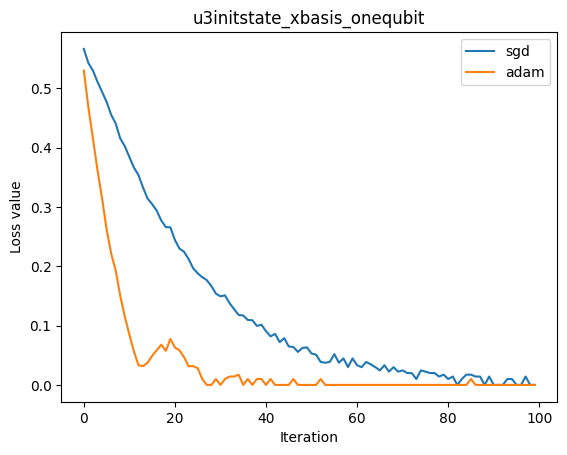

In [17]:
theta = np.random.uniform(0, np.pi)
phi = np.random.uniform(0, 2*np.pi)
lambdaz = 0

for optimizer in ['sgd', 'adam']:    
    qcu3 = qiskit.QuantumCircuit(1, 1)
    qcu3.u(theta, phi, lambdaz, 0)
    compiler = qtm.qcompilation.QuantumCompilation(
        u = qcu3,
        vdagger = qtm.ansatz.zxz_layer(1).inverse(),
        optimizer = optimizer,
        loss_func = 'loss_fubini_study'
    )
    compiler.fit(num_steps = 100, verbose = 1)
    plt.plot(compiler.loss_values, label=optimizer, linestyle = '-')
plt.title('u3initstate_xbasis_onequbit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")